In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from scipy.stats import beta


%matplotlib inline

In [3]:
ads_data = pd.read_csv('Ads_Optimisation.csv', header=1, names = ['Ads1','Ads2','Ads3','Ads4','Ads5','Ads6','Ads7','Ads8','Ads9','Ads10'])

### 데이터 로드

In [4]:
ads_data

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


### 2000개만 가져오기

In [5]:
samples = ads_data.iloc[:2000, :]

In [6]:
# CTR of each ads, total data
Series.sort_values(ads_data.sum()/len(ads_data), ascending=False)

Ads5     0.269427
Ads8     0.209121
Ads1     0.170217
Ads2     0.129513
Ads4     0.119612
Ads7     0.111211
Ads9     0.095110
Ads3     0.072807
Ads10    0.048905
Ads6     0.012601
dtype: float64

In [7]:
# CTR of each ads, Samples 
Series.sort_values(samples.sum()/len(samples), ascending=False)

Ads5     0.2710
Ads8     0.2120
Ads1     0.1700
Ads4     0.1300
Ads2     0.1240
Ads7     0.1015
Ads9     0.0965
Ads3     0.0695
Ads10    0.0450
Ads6     0.0115
dtype: float64

#### 샘플링한 것과 전체 데이터는 거의 비슷하다, 5번 광고가 가장 CTR이 높고, 8번 순이다, 가장 낮은 CTR을 보이는 광고는 6번이다.

* 어떻게 실험할까?
 - 광고의 안은 10개이다, 샘플 수는 2000개니까 2000번 광고를 노출 시킬 것이다.
 - 노출을 시킬 때 어떤 광고를 보여줄지 정하는 게 중요한 것 같다. Beta 분포에서 샘플링 해서 샘플링 된 rvs 값이 큰 걸 노출 시키는 방법을 사용해야겠다.
 - 광고가 노출되면, sample에서 해당 광고의 데이터로 이동해서 0이면 beta를 +1하고 1이면 alpha를 +1한다.
 - 해당 광고가 다음 노출이 될 때까지 이 상태를 유지한다.

### 시각화 코드 연습

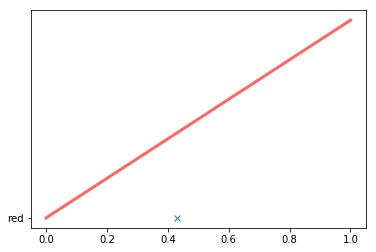

In [8]:
ads_1 = beta.rvs(1,1, size=1)
ads_1

fig, ax = plt.subplots(1, 1)


x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, 2, 1), 'r-', lw=3, alpha=0.6, label='ads_1')
ax.plot(ads_1, 0, 'x', 'red')

In [94]:
#for문 돌면 i가 1씩 늘어나니까 앞에 i를 넣으면?
#뒤에 Format string을 삽입하는게 가능한가? ==> iloc에 max_rvs_ad를 넣으면 해결

for i in range(10):
    print(samples.iloc[0,i])

0
0
0
0
0
0
0
0
1
0


In [182]:
tst = 'ads_'+'{}'.format(max_rvs_ad)

In [184]:
# eval을 사용하면 str으로 얻어진 값을 객체로 변환할 수 있다!!!!!!!
eval(tst)

array([0.28651494])

In [181]:
s = 'Hello, Geeks.'
print (repr(s) )
print (repr(2.0/11.0) )

'Hello, Geeks.'
0.18181818181818182


In [ ]:
# 챔피언 광고를 구한 상태에서 챔피언 광고에 대해 베타값을 수정해주는 작업이 필요

In [ ]:
regret = 0 
total_reward = 0
regret_list = [] 
ctr = {0: [], 1: []}
index_list = [] 
impressions = [0,0] 
clicks = [0,0]
priors = (1, 1)
win_index = np.random.randint(0,2,1)[0] ## randomly choose the first shown Ad

for i in range(n):    
    impressions[win_index] += 1
    did_click = bernoulli.rvs(ACTUAL_CTR[win_index])
    
    if did_click:
        clicks[win_index] += did_click
    
    ctr_0 = random.betavariate(priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
    ctr_1 = random.betavariate(priors[0]+clicks[1], priors[1] + impressions[1] - clicks[1])
    win_index = np.argmax([ctr_0, ctr_1])
    index_list.append(win_index)
    
    ctr[0].append(ctr_0)
    ctr[1].append(ctr_1)
    
    regret += max(ACTUAL_CTR) - ACTUAL_CTR[win_index]
    regret_list.append(regret)    
    total_reward += did_click

    
## plot the Beta distributions
x = np.arange (0, 1, 0.01)
y = beta.pdf(x, priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
y /= y.max() ## normalize


win하는 index가(win_index)있고 index에 맞는, 숫자에 해당하는 init_alpha_1,2,3,4중 하나에 +1을 해주려고 하는데
대충 init_alpha_{win_index} += 1 이런 식으로 동작하려면 어떻게 해야하는지?

In [199]:
id(eval('init_alpha_' + '{}'.format(win_index)))

4537554256

In [201]:
id(init_alpha_1)

4537554256

In [275]:
beta.rvs(5000,init_beta_1, size=1)

array([0.99995808])

In [279]:
'ads_'+'{}'.format(win_index)

'ads_2'

In [280]:
buffalo = 4
x='buffalo'    
exec("%s = %d" % (x,2))

print (buffalo)

2


In [112]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)

#max_rvs를 가져와서 해당 값을 가진 광고를 찾는 코드
ads_rvs=[ads_1, ads_2, ads_3, ads_4]
print(ads_rvs)
max_rvs = np.max(ads_rvs)
win_index = ads_rvs.index(max_rvs)
win_index
#print('ads_'+'{}'.format(win_index))

# eval('ads_'+'{}'.format(win_index))
# eval('init_alpha_' + '{}'.format(win_index+1))

##### 해당 ad 들어가서 0일때 1일 때 alpha, beta값 조정
# ads 별로 0 1값을 바로 rvs에 넣으면?

[array([0.35715326]), array([0.08920128]), array([0.65963647]), array([0.87369407])]


3

In [81]:
print(samples.iloc[:100,0].sum(),samples.iloc[:100,1].sum(),samples.iloc[:100,2].sum(),samples.iloc[:100,3].sum())

8 15 7 13


In [90]:
print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)

1 1 1 1


In [116]:
samples.iloc[:100, :3]

,Ads1,Ads2,Ads3
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,1,1,0
5,0,0,0
6,1,1,0
7,0,0,0
8,0,0,1
9,0,0,0


### 테스트 코드

2
1 1 1 1
2
1 1 1 1
2
1 1 1 1
1
1 1 1 1
3
1 1 1 1
0
1 1 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
1
2 3 1 1
1
2 3 1 1
3
2 3 1 1
1
2 3 1 1
2
2 3 1 1
1
2 3 1 2
2
2 4 1 2
3
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2


/Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1
2 4 2 2
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
3
2 4 2 3
3
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
0
3 5 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 5 2 3
3
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 6 2 3
1
3 6 2 3
1
3 6 2 3
1
3 7 2 3
1
3 7 2 3
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 5
1
3 7 2 5
3
3 7 2 5
3
3 7 2 5
2
3 7 2 5
0
3 7 2 5
1
3 7 2 5
1
3 7 2 5
2
3 7 2 5
0
3 7 2 5
3
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
3
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
0
3 7 2 6
0
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6


1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 33
1
6 37 18 33
1
6 37 18 33
1
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
0
6 37 18 34
3
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34

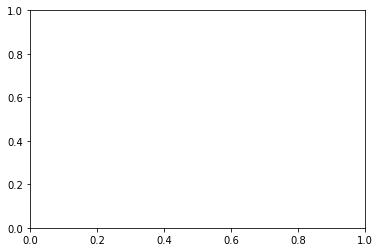

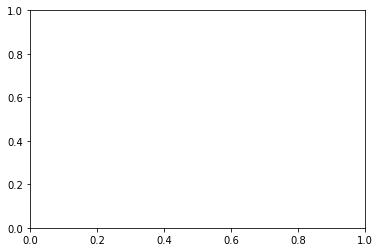

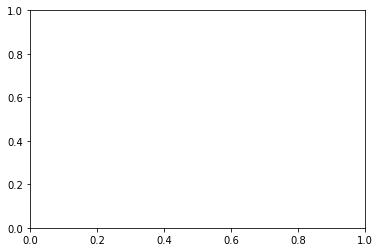

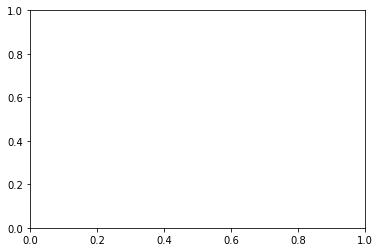

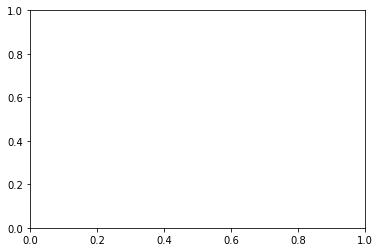

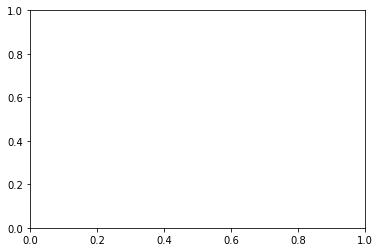

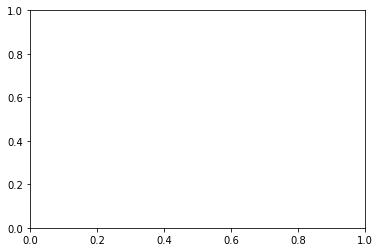

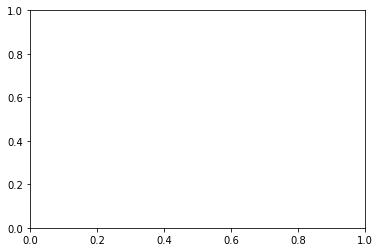

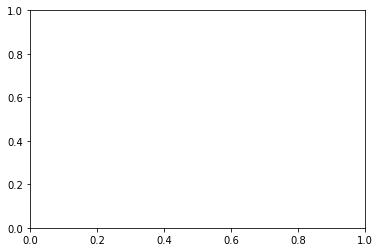

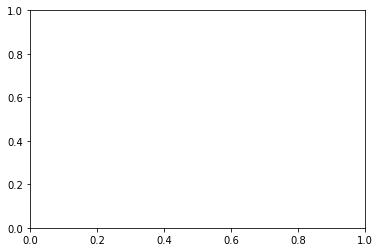

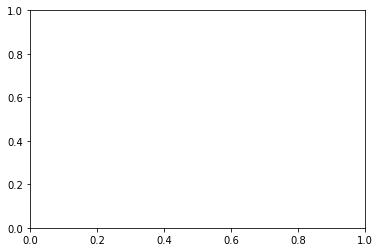

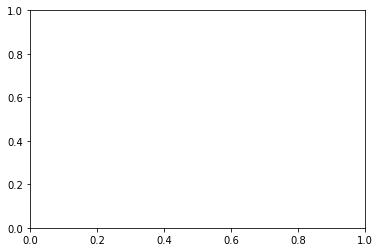

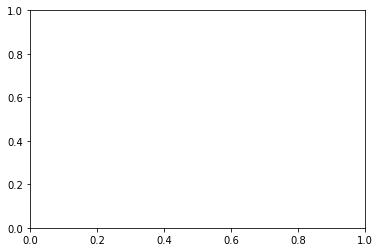

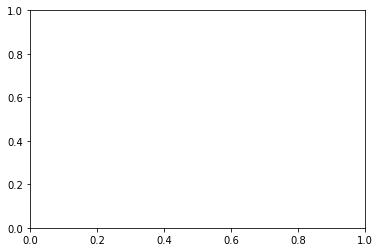

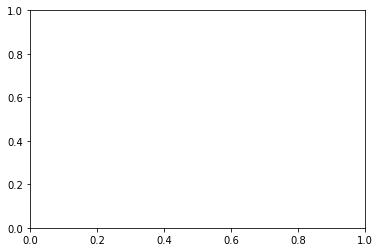

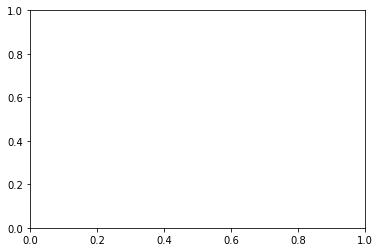

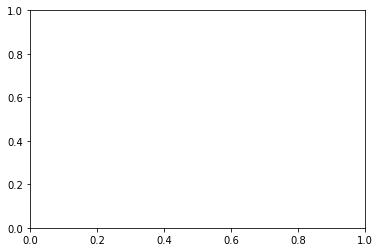

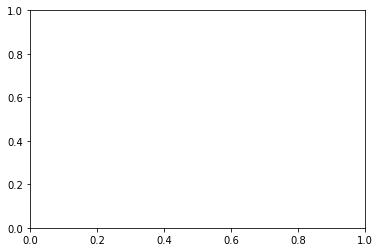

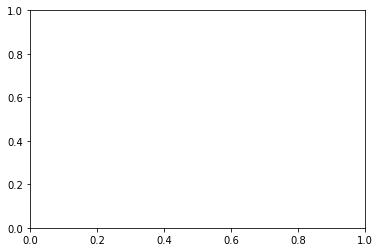

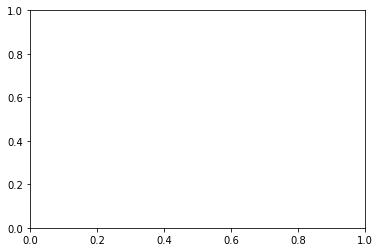

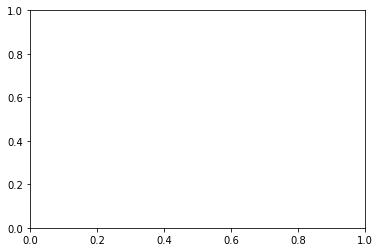

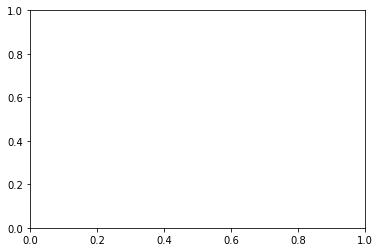

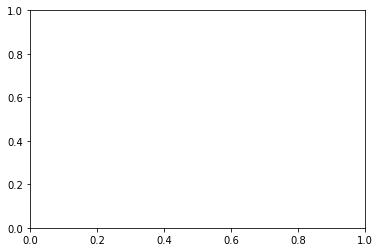

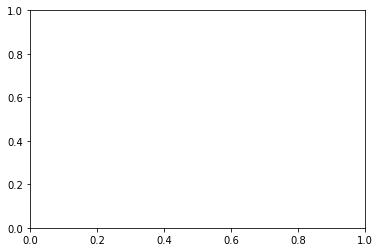

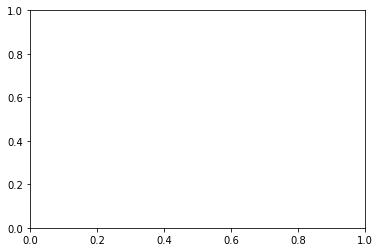

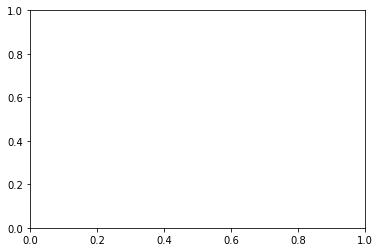

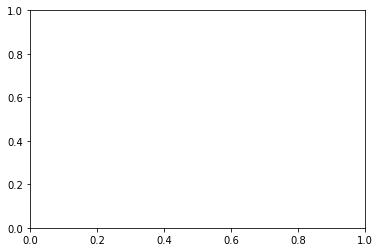

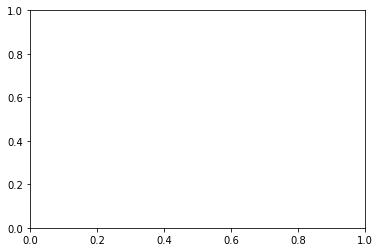

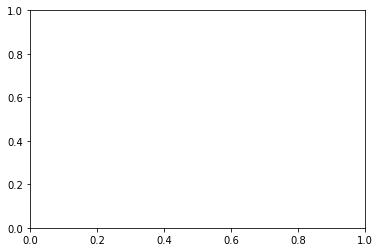

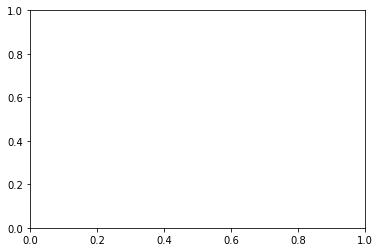

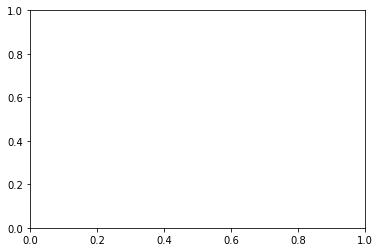

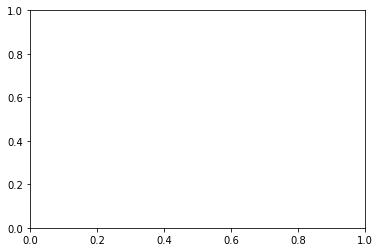

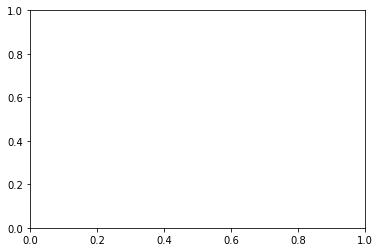

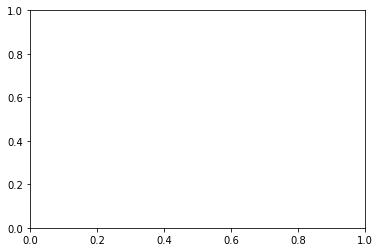

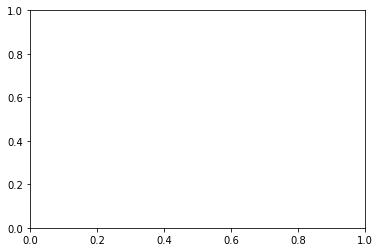

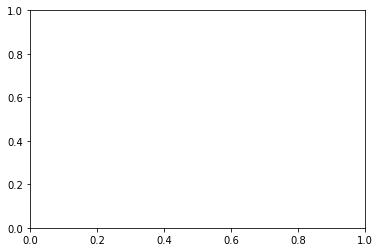

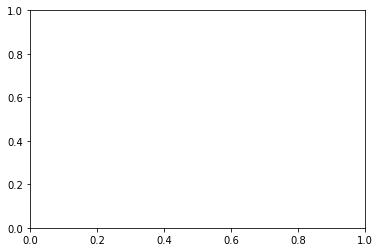

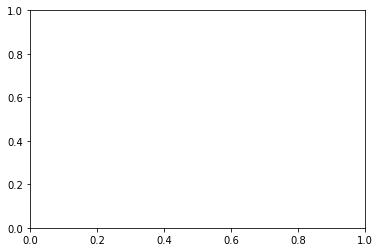

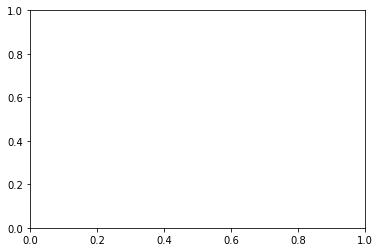

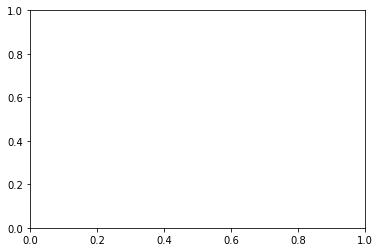

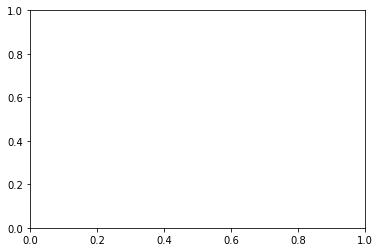

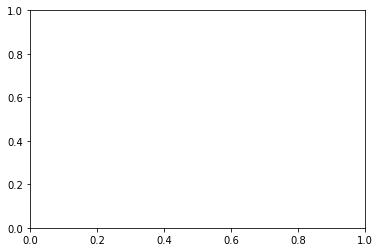

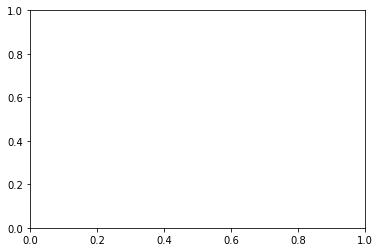

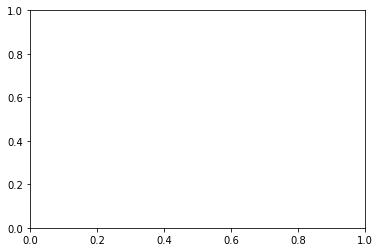

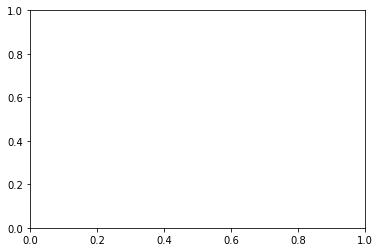

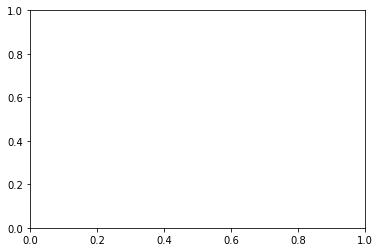

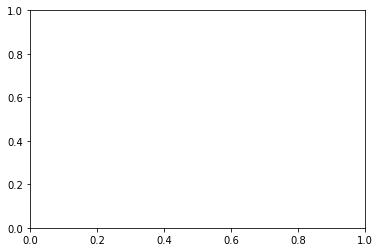

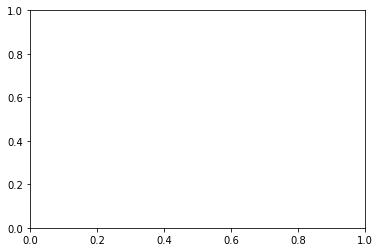

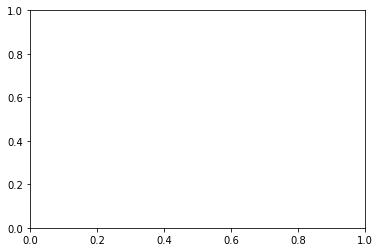

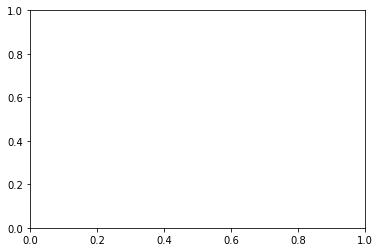

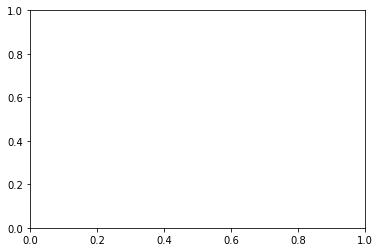

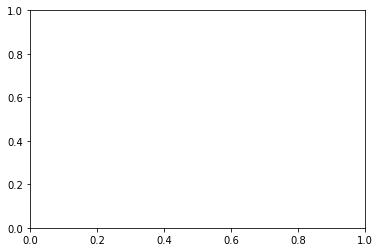

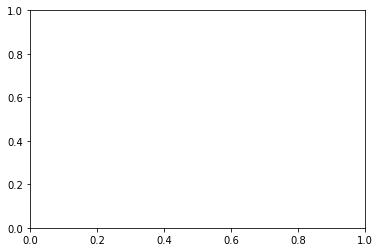

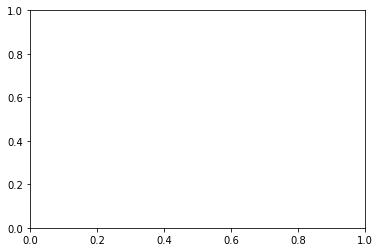

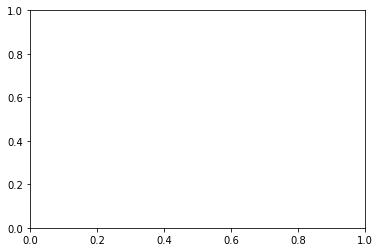

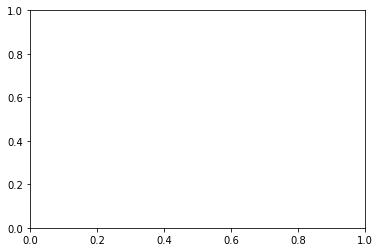

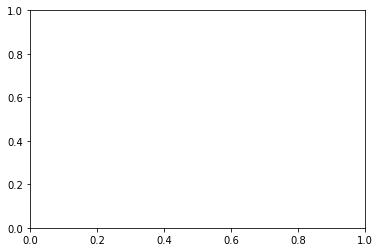

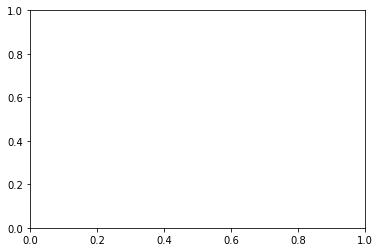

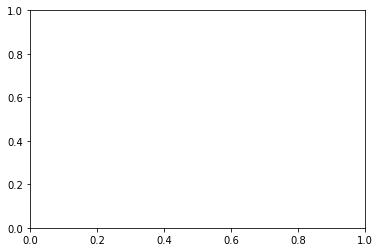

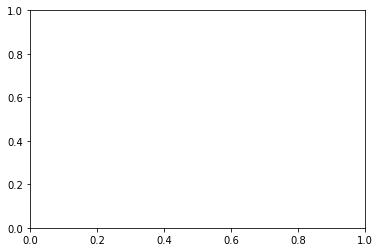

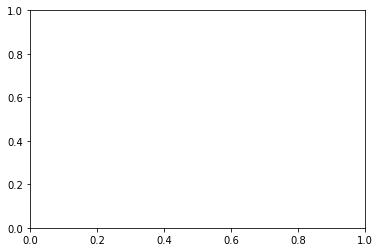

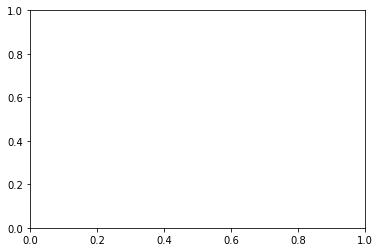

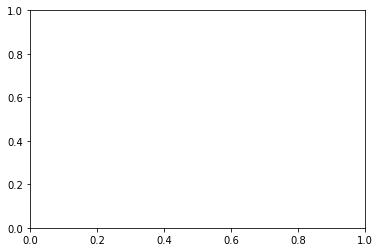

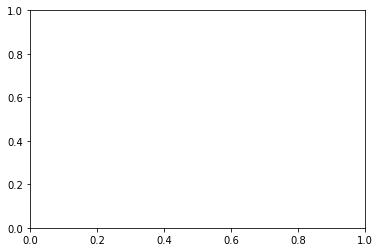

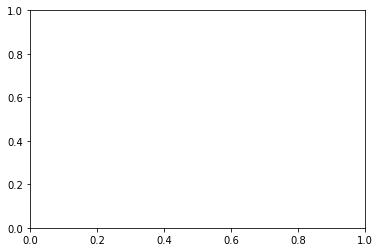

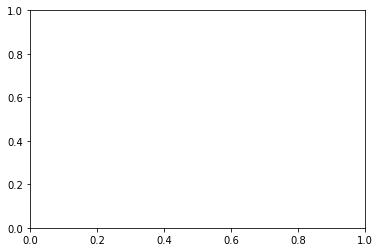

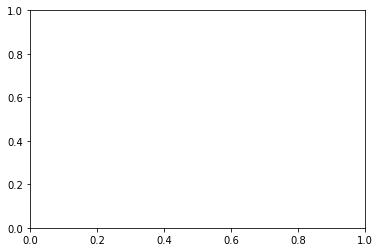

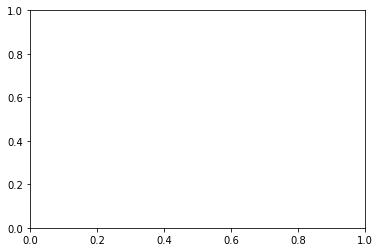

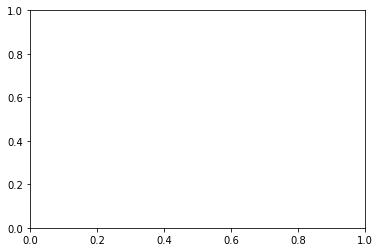

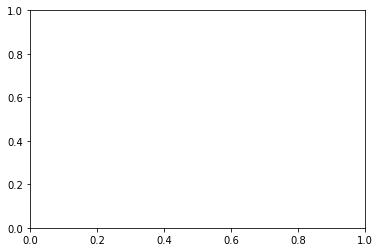

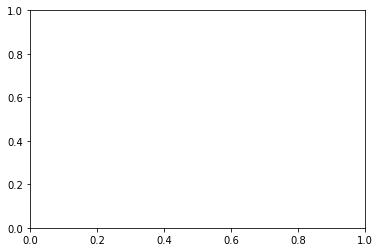

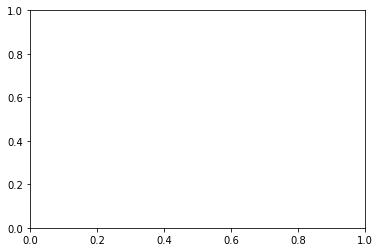

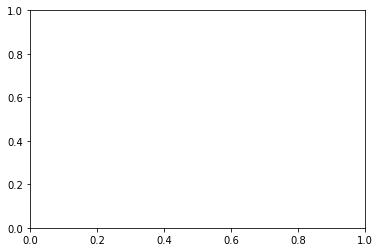

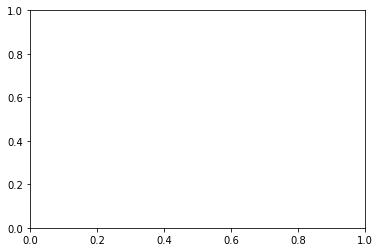

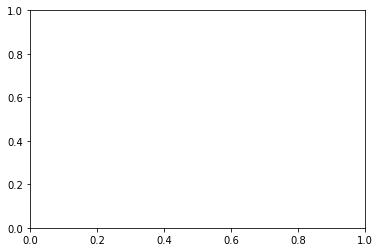

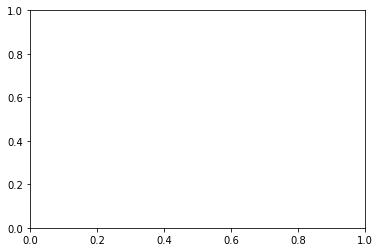

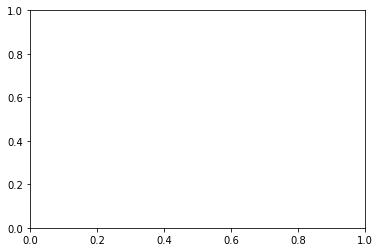

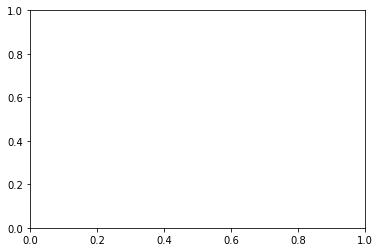

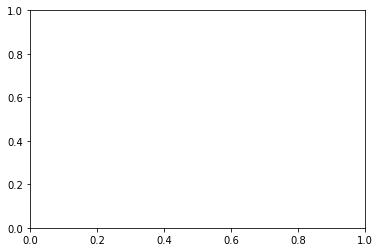

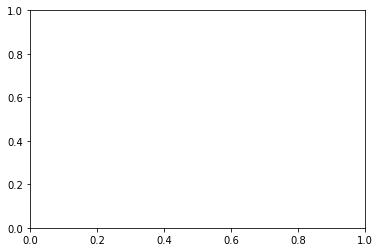

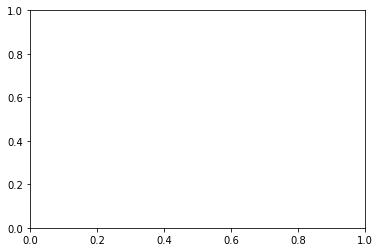

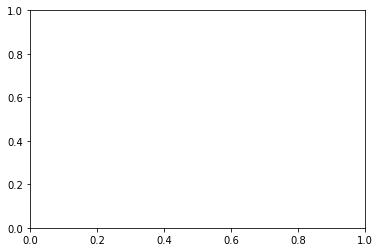

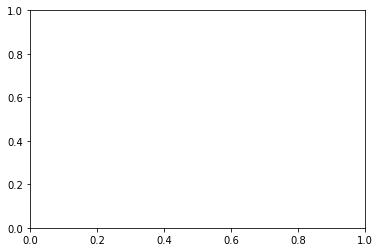

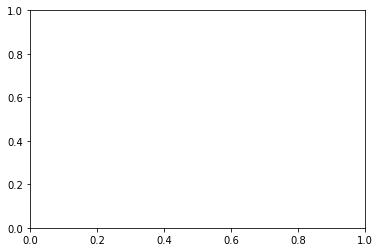

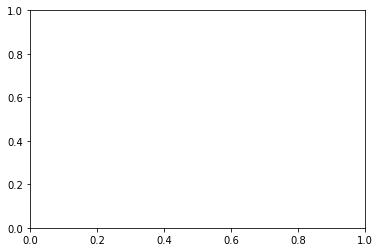

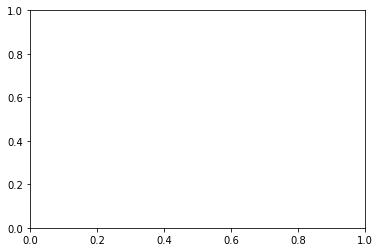

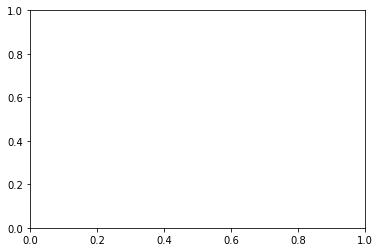

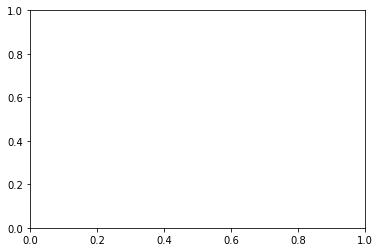

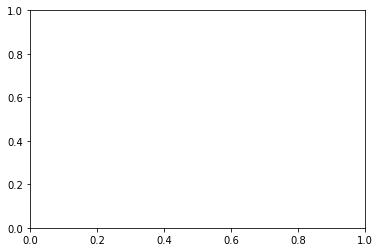

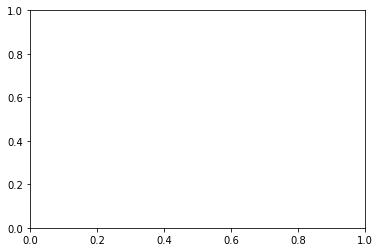

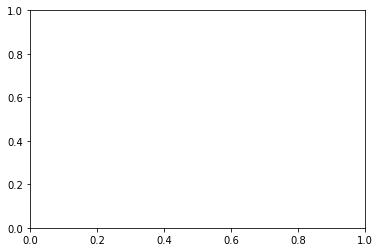

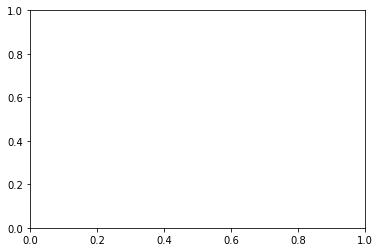

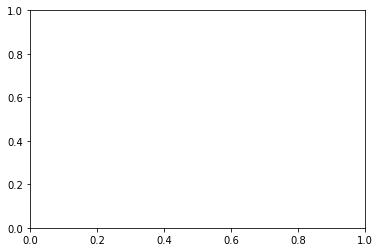

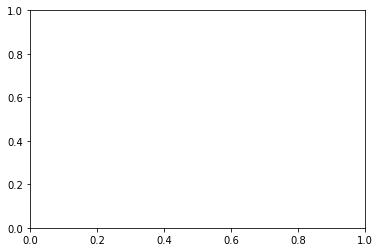

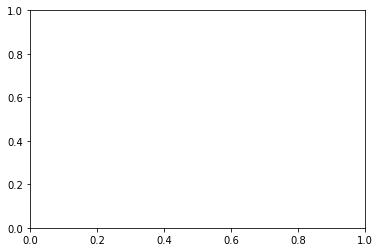

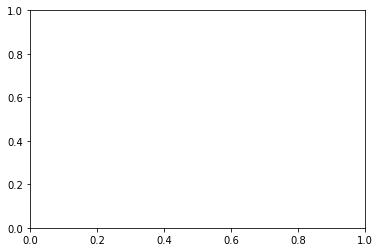

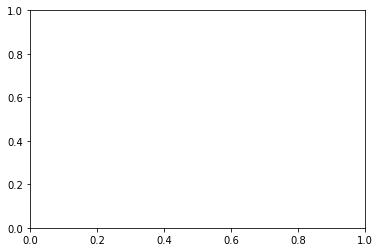

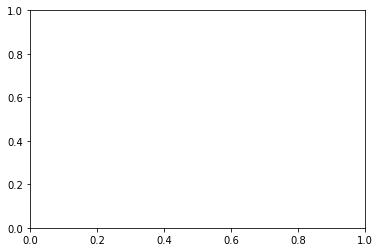

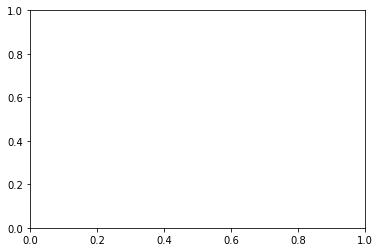

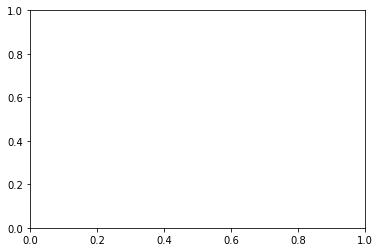

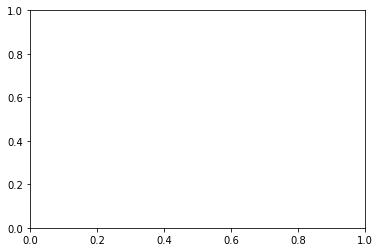

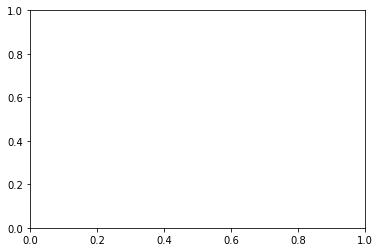

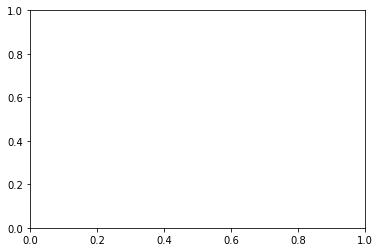

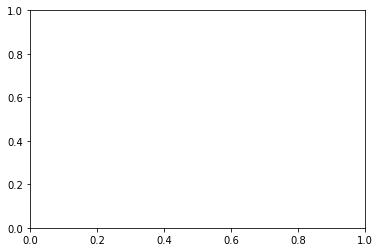

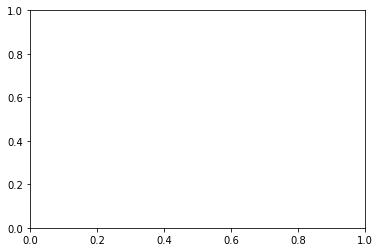

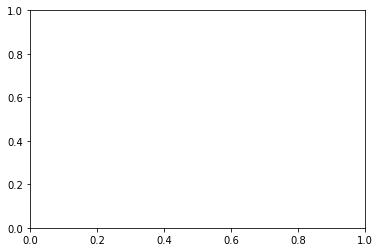

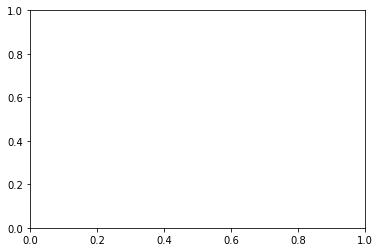

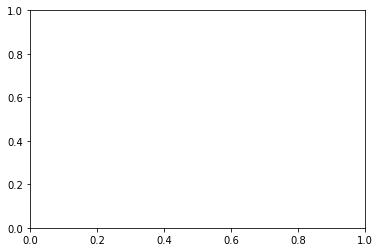

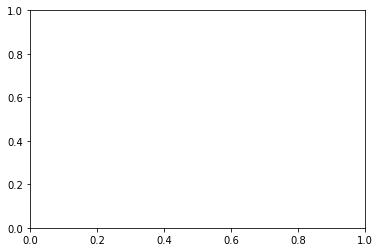

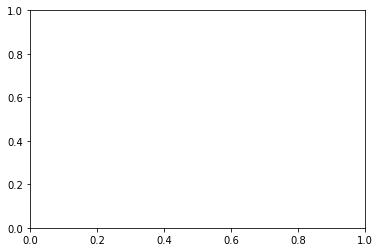

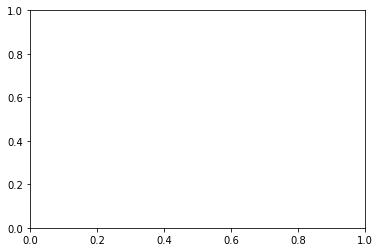

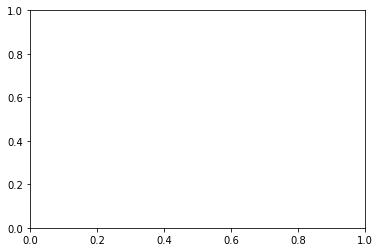

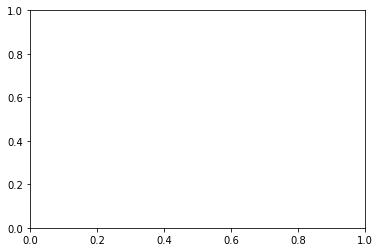

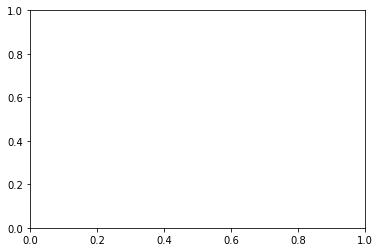

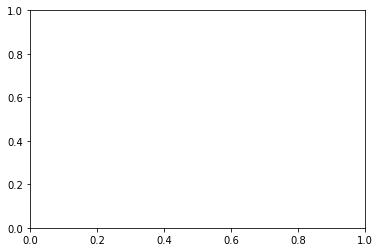

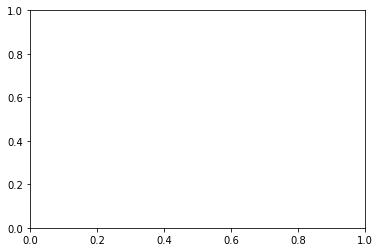

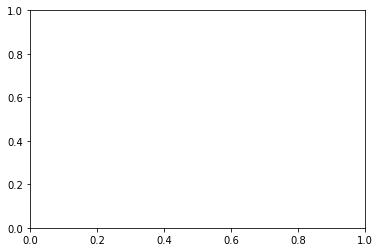

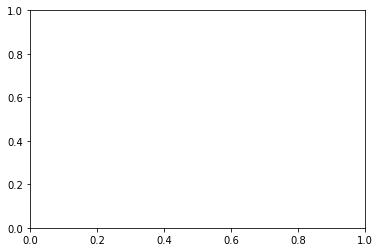

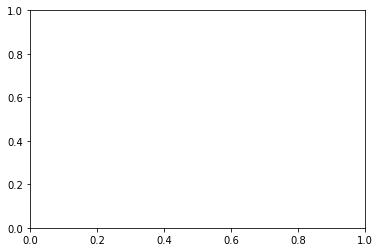

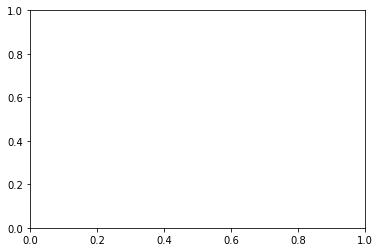

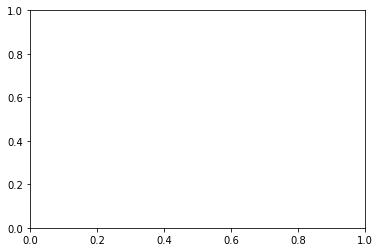

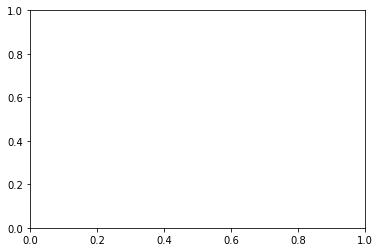

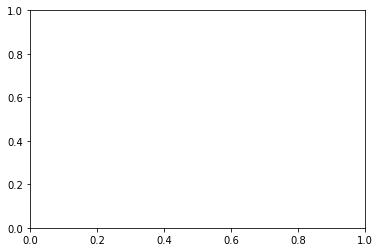

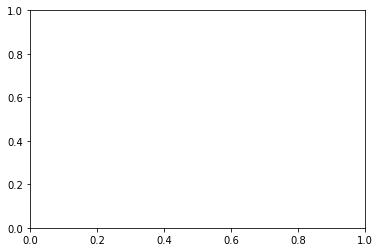

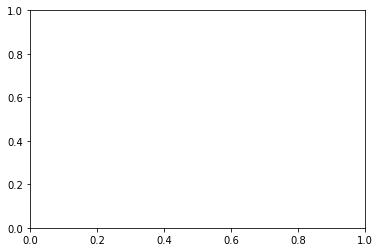

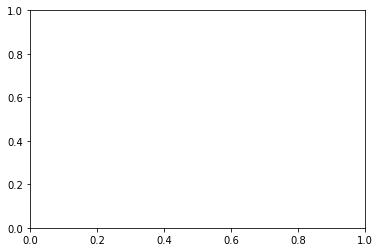

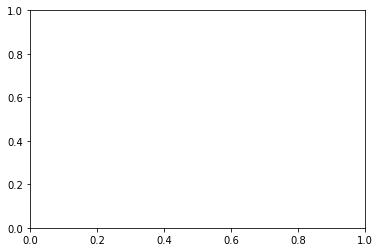

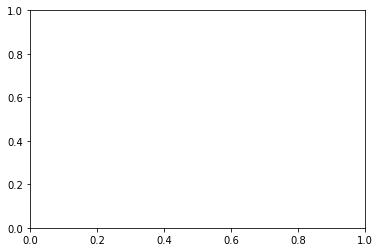

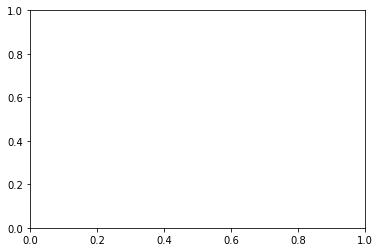

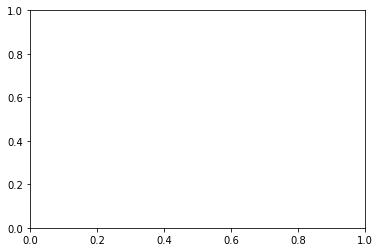

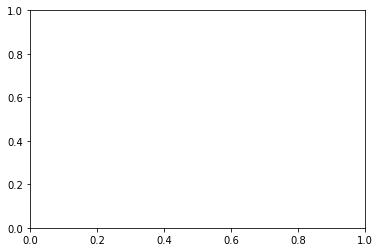

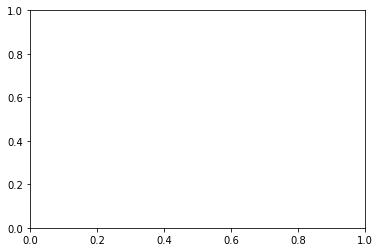

In [ ]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1
x = np.linspace(0, 1, 100)
for i in range(0,300):
    for j in range(1,4):
        fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs=[ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        print(win_index)
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                init_alpha_1 += 1

            else :
                init_beta_1 += 1

        if j == 1 :
            if samples.iloc[i,j] == 1:
                init_alpha_2 += 1

            else :
                init_beta_2 += 1

            
        if j == 2 :
            if samples.iloc[i,j] == 1:
                init_alpha_3 += 1

            else :
                init_beta_3 += 1

        
        if j == 3 :
            if samples.iloc[i,j] == 1:
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

                
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

In [13]:
Series.sort_values(samples.iloc[:100, 0:4].sum()/200, ascending=False)

Ads2    0.075
Ads4    0.065
Ads1    0.040
Ads3    0.035
dtype: float64

In [15]:
#real_ctr
Series.sort_values(samples.iloc[100:200, 0:4].sum()/100, ascending=False)


Ads2    0.18
Ads1    0.17
Ads4    0.08
Ads3    0.06
dtype: float64

### 실험결과
초기에 가중치가 작은 광고는 나중에도 선택이 잘 안되는 경우가 발생함. 심각한 문제
- 이럴 경우를 방지하기 위해 기준을 갖고(일 단위, 또는 시간 단위)로 나눠서 CTR을 측정하고 CTR에 따라 prior를 조정해 줘야 함.(기준 시점에 CTR이 높은 광고 안은 alpha 값을 올려준다. 얼마나 올려줄지?)


### 다음 실험 내용 
- traffic이 100단위 도달할 때마다 CTR계산해서 prior 정보 제공하기!
- 100단위로 끊어서 CTR 계산하는 코드 작성
- Prior을 어떻게 줄 것인가?

In [27]:
100%100

0

### 실험 코드

In [70]:
samples.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [69]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

x = np.linspace(0, 1, 100)
for i in range(0,201):  
#     if i != 0 :
#         pass
#     else :
#         continue

    if (i % 100 == 0) & (i != 0) :

        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('CTR_of_ads :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - Calculated_Ctr :',
              samples.iloc[:i-cnt,0].sum()/100 -success_1/100,
              samples.iloc[:i-cnt,1].sum()/100 - success_2/100, 
              samples.iloc[:i-cnt,2].sum()/100 - success_3/100, 
              samples.iloc[:i-cnt,3].sum()/100 - success_4/100)
        cnt = i
        success_1 = success_2 = success_3 = success_4 = 0

    for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1
                
        

#         if j == 1 :
#             if samples.iloc[i,j] == 1:
#                 success_2 += 1
#                 init_alpha_2 += 1

#             else :
#                 init_beta_2 += 1

            
#         if j == 2 :
#             if samples.iloc[i,j] == 1:
#                 success_3 += 1
#                 init_alpha_3 += 1

#             else :
#                 init_beta_3 += 1

        
#         if j == 3 :
#             if samples.iloc[i,j] == 1:
#                 success_4 += 1
#                 init_alpha_4 += 1

#             else :
#                 init_beta_4 += 1

        
        print('Checking Zeros',success_1, success_2, success_3, success_4)
#         print(success_1/100, success_2/100, success_3/100, success_4/100)

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Ze

Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
CTR_of_ads : 0.01 0.18 0.06 0.08
Summed_Ctr - Calculated_Ctr : 0.07 -0.03 0.010000000000000009 0.05
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0


In [ ]:
#0.11 0.07 0.07 0.13
samples.iloc[:100, 0:4].sum()/100
# 이럴 경우에는 summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 보여줘...광고1번은 좀 prior을 이용해서 줄여줘

#### 이럴 경우에는 summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 보여줘...광고1번은 좀 prior을 이용해서 줄여줘

In [46]:
#0.01 0.18 0.06 0.08
samples.iloc[100:200, 0:4].sum()/100

Ads1    0.17
Ads2    0.18
Ads3    0.06
Ads4    0.08
dtype: float64

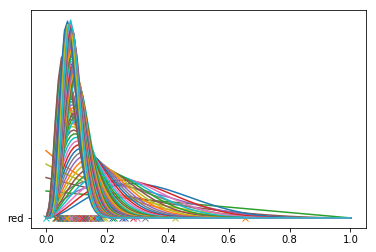

In [25]:
init_alpha = 1
init_beta = 1
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
for i in range(0, 100):
    #iloc의 앞에 0은 i로 바뀔 것
    if samples.iloc[i,0] == 0 :
        #ads_12345...을 어떻게 불러올 것인지, beta.rvs에서 알파베타값 어떻게 올려줄 것인가
        alpha_ = 0
        bet = 1
        init_alpha += alpha_ 
        init_beta += bet
        ads_1 = beta.rvs(init_alpha, init_beta)

    else :
        alpha_ = 1
        bet = 0
        init_alpha += alpha_ 
        init_beta += bet
        ads_1 = beta.rvs(init_alpha, init_beta)
    
    ax.plot(x, beta.pdf(x, init_alpha, init_beta), 'r-', lw=3, alpha=0.0001, label='ads_1')
    ax.plot(ads_1, 0, 'x', 'red')

    ax.plot(x, beta.pdf(x, init_alpha, init_beta))
    
    #ax.plot(x, beta.pdf(x, 1, 1), 'r-', lw=3, alpha=0.6, label='ads_1')
    #ax.plot(ads_1, 0, 'x', 'red')

In [93]:
samples.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [113]:
samples.iloc[0,max_rvs_ad]

0

### 코드 수정

In [130]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

# x = np.linspace(0, 1, 100)
for i in range(0,201):  
##     if i != 0 :
##         pass
##     else :
##         continue
    
    ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
    ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
    ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
    ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
    ads_rvs = [ads_1, ads_2, ads_3, ads_4]
    max_rvs = np.max(ads_rvs)
    win_index = ads_rvs.index(max_rvs)

    print('win index?',win_index, 'i?',i)

    if win_index == 0 :
        if samples.iloc[i,win_index] == 1:
            success_1 += 1
            init_alpha_1 += 1

        else :
            init_beta_1 += 1


    if win_index == 1 :
        if samples.iloc[i,win_index] == 1:
            success_2 += 1
            init_alpha_2 += 1

        else :
            init_beta_2 += 1


    if win_index == 2 :
        if samples.iloc[i,win_index] == 1:
            success_3 += 1
            init_alpha_3 += 1

        else :
            init_beta_3 += 1


    if win_index == 3 :
        if samples.iloc[i,win_index] == 1:
            success_4 += 1
            init_alpha_4 += 1

        else :
            init_beta_4 += 1
    
    print('Click or Fail',samples.iloc[i,win_index])
    print(success_1, success_2, success_3, success_4)
#         print('Checking Zeros',success_1, success_2, success_3, success_4)
    
    
    if (i % 100 == 0) & (i != 0) :
        print('i-cnt',i-cnt)
        cnt = i
        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                             samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
        print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - CTR_of_ads(Experiment) :',
              round(samples.iloc[:i-cnt,0].sum()/100 - success_1/100, 2),
              round(samples.iloc[:i-cnt,1].sum()/100 - success_2/100, 2), 
              round(samples.iloc[:i-cnt,2].sum()/100 - success_3/100, 2), 
              round(samples.iloc[:i-cnt,3].sum()/100 - success_4/100, 2))
 
        print(samples.iloc[:i-cnt,0].sum()/100, samples.iloc[:i-cnt,1].sum()/100, samples.iloc[:i-cnt,2].sum()/100, samples.iloc[:i-cnt,3].sum()/100)
        success_1 = success_2 = success_3 = success_4 = 0

# if np.max(samples.iloc[:i-cnt,0].sum()/100, 
#           samples.iloc[:i-cnt,1].sum()/100,
#           samples.iloc[:i-cnt,2].sum()/100, 
#           samples.iloc[:i-cnt,3].sum()/100) == np.max(CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4):
#     print('Correct!')

#     for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

win index? 0 i? 0
Click or Fail 0
0 0 0 0
win index? 1 i? 1
Click or Fail 0
0 0 0 0
win index? 3 i? 2
Click or Fail 0
0 0 0 0
win index? 2 i? 3
Click or Fail 0
0 0 0 0
win index? 0 i? 4
Click or Fail 1
1 0 0 0
win index? 0 i? 5
Click or Fail 0
1 0 0 0
win index? 2 i? 6
Click or Fail 0
1 0 0 0
win index? 3 i? 7
Click or Fail 0
1 0 0 0
win index? 0 i? 8
Click or Fail 0
1 0 0 0
win index? 3 i? 9
Click or Fail 0
1 0 0 0
win index? 0 i? 10
Click or Fail 0
1 0 0 0
win index? 2 i? 11
Click or Fail 0
1 0 0 0
win index? 0 i? 12
Click or Fail 0
1 0 0 0
win index? 1 i? 13
Click or Fail 0
1 0 0 0
win index? 0 i? 14
Click or Fail 0
1 0 0 0
win index? 1 i? 15
Click or Fail 0
1 0 0 0
win index? 1 i? 16
Click or Fail 0
1 0 0 0
win index? 3 i? 17
Click or Fail 0
1 0 0 0
win index? 0 i? 18
Click or Fail 0
1 0 0 0
win index? 3 i? 19
Click or Fail 0
1 0 0 0
win index? 0 i? 20
Click or Fail 0
1 0 0 0
win index? 3 i? 21
Click or Fail 0
1 0 0 0
win index? 2 i? 22
Click or Fail 0
1 0 0 0
win index? 1 i? 23
Cl

### 데이터를 확인해보니 광고가 동시에 노출되는 경우가 있는 것으로 보임
- 일단 무시하고 진행? (그럼 summed_ctr과 experiment_ctr의 범위가 달라지지 않나?)
- 그냥 success count를 2로 줘볼까?
- CTR값의 차이를 통한 가중치의 조정?

In [75]:
samples.iloc[:200, 0].sum()

25

In [129]:
samples.iloc[100:200, :4].sum()/100

Ads1    0.17
Ads2    0.18
Ads3    0.06
Ads4    0.08
dtype: float64